# Case Study - Marketing Campaign

A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service.

Columns
*   ID - Customer's id
*   Year_Birth - Customer's year of birth
*   Education - Customer’s level of education
*   Marital_Status - Customer’s marital status
*   Income - Customer’s yearly household income
*   Kidhome - Number of small children in customer’s household
*   Teenhome - Number of teenagers in customer’s household
*   Dt_Customer - Date of customer’s enrolment with the company
*   Recency - Number of days since the last purchase
*   MntWines - Amount spent on wine products in the last 2 years
*   MntFruits - Amount spent on fruits products in the last 2 years
*   MntMeatProducts - Amount spent on meat products in the last 2 years
*   MntFishProducts - Amount spent on fish products in the last 2 years
*   MntSweetProducts - Amount spent on sweet products in the last 2 years
*   MntGoldProds - Amount spent on gold products in the last 2 years
*   NumDealsPurchases - Number of purchases made with discount
*   NumWebPurchases - Number of purchases made through company’s web site
*   NumCatalogPurchases - Number of purchases made using catalogue
*   NumStorePurchases - Number of purchases made directly in stores
*   NumWebVisitsMonth - Number of purchases made through company’s web site
*   AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
*   AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
*   AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
*   AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
*   AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
*   Complain - 1 if customer complained in the last 2 years
*   Z_CostContact - Cost to contact a customer
*   Z_Revenue - Revenue after client accepting campaign
*   Response - 1 if customer accepted the offer in the last campaign, 0 otherwise

ในเคสนี้

*   ถ้าลูกค้าตอบรับ Campaign ล่าสุด ซึ่งเป็น Positive Case จะมีค่าเท่ากับ 1
*   ถ้าลูกค้าไม่ตอบรับ Campaign ล่าสุด ซึ่งเป็น Nagative Case จะมีค่าเท่ากับ 0



# Data Prepration

In [ ]:
# Load module ที่เราต้องการใช้ทั้งหมด

import pandas as pd

In [ ]:
# อ่านไฟล์ข้อมูลที่ต้องการวิเคราะห์

url = 'https://github.com/thanachart/ai-builders-tabular-data/raw/main/Data/marketing_campaign.csv'
df = pd.read_csv(url, parse_dates=['Dt_Customer'])

In [ ]:
# แสดงผลตัวอย่างข้อมูล

df.tail(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
663,7118,1957,Graduation,Married,73803.0,0,1,2012-08-01,61,833,...,6,1,0,0,0,0,0,3,11,1
664,2632,1954,Graduation,Married,50501.0,1,1,2013-06-18,10,297,...,6,1,0,0,0,0,0,3,11,1
665,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,8,0,0,0,0,0,0,3,11,1
666,7366,1982,Master,Single,75777.0,0,0,2013-07-04,12,712,...,1,0,1,1,0,0,0,3,11,1
667,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,7,0,0,0,0,0,0,3,11,1


In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,668.000000,668.000000,665.000000,668.000000,668.000000,668,668.000000,668.000000,668.000000,668.000000,...,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.0,668.0,668.000000
mean,5358.886228,1969.065868,55496.433083,0.359281,0.432635,2013-06-01 16:27:18.323353344,43.187126,393.600299,31.534431,222.016467,...,5.224551,0.133234,0.119760,0.149701,0.133234,0.031437,0.013473,3.0,11.0,0.500000
min,1.000000,1943.000000,2447.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2631.750000,1959.000000,37760.000000,0.000000,0.000000,2012-11-30 18:00:00,17.000000,40.000000,3.000000,25.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5092.500000,1970.000000,56937.000000,0.000000,0.000000,2013-05-17 12:00:00,40.000000,267.000000,14.500000,111.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.500000
75%,8145.000000,1978.000000,73356.000000,1.000000,1.000000,2013-11-17 12:00:00,68.000000,677.000000,40.500000,363.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,1.000000
max,11178.000000,1996.000000,105471.000000,2.000000,2.000000,2014-06-26 00:00:00,99.000000,1492.000000,197.000000,1725.000000,...,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3239.622817,12.060760,21947.625057,0.495516,0.542039,NaN,28.880917,385.010485,42.634182,258.899559,...,2.450811,0.340082,0.324925,0.357045,0.340082,0.174627,0.115375,0.0,0.0,0.500375


In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df.shape

(668, 29)

## จัดการ Missing Value

In [ ]:
# check missing data

df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 3
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
# ลบ row ที่มี missing value

df = df.dropna(how='any',axis=0)

In [ ]:
# check missing data

df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
df.shape

(665, 29)

## จัดการ Time-related column

หา cut-off date ของ dataset

In [ ]:
print('Min Date : ' + str(df['Dt_Customer'].min()))
print('Max Date : ' + str(df['Dt_Customer'].max()))

Min Date : 2012-07-30 00:00:00
Max Date : 2014-06-26 00:00:00


วันที่สุดท้ายที่มีลูกค้าสมัครเป็นสมาชิก คือ 2014-06-26

In [ ]:
df[df['Dt_Customer'] == '2014-06-26 00:00:00']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
206,1225,1963,Graduation,Married,80124.0,0,0,2014-06-26,47,483,...,1,1,0,0,0,0,0,3,11,0


แต่เมื่อดูข้อมูลแล้ว เรามีข้อมูลการซื้อของลูกค้าในช่วง 2 ปีที่ผ่านมา

เราจึงจะสมมติว่าวันที่ที่ไฟล์นี้ถูกสร้างขึ้นมา คือ 2016-06-26 (2 ปีถัดจากลูกค้าคนสุดท้ายที่มาสมัครสมาชิก)

In [ ]:
import datetime

cut_off_date = datetime.datetime(2016,6,26)

In [ ]:
cut_off_year = 2016

In [ ]:
df['Age'] = cut_off_year - df['Year_Birth']

<ipython-input-198-554719be958f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = cut_off_year - df['Year_Birth']


In [ ]:
df['Member_Age'] = cut_off_year - df['Dt_Customer'].dt.year

In [ ]:
df.iloc[:,20:].head()

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Member_Age
0,0,0,0,0,0,0,3,11,0,53,3
1,0,0,0,0,0,0,3,11,0,59,2
2,0,0,0,0,0,0,3,11,0,66,2
3,0,0,0,0,0,0,3,11,0,61,2
4,0,0,0,0,0,0,3,11,0,71,4


## Feature Engineering

In [ ]:
df['Total_Spend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [ ]:
df['Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

In [ ]:
for i in ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']:
  col_name = 'PCT_' + i
  df[col_name] = df[i]/df['Total_Spend']

In [ ]:
for i in ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']:
  col_name = 'PCT_' + i
  df[col_name] = df[i]/df['Total_Purchases']

In [ ]:
df['PCT_DealsPurchases'] = df['NumDealsPurchases']/df['Total_Purchases']

In [ ]:
df['PCT_Campaigns'] = df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].sum(axis=1) / 5

In [ ]:
df.iloc[:,20:].head()

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,...,PCT_MntFruits,PCT_MntMeatProducts,PCT_MntFishProducts,PCT_MntSweetProducts,PCT_MntGoldProds,PCT_NumWebPurchases,PCT_NumCatalogPurchases,PCT_NumStorePurchases,PCT_DealsPurchases,PCT_Campaigns
0,0,0,0,0,0,0,3,11,0,53,...,0.024784,0.132543,0.010776,0.024784,0.165948,0.380952,0.428571,0.190476,0.095238,0.0
1,0,0,0,0,0,0,3,11,0,59,...,0.057314,0.427716,0.170231,0.000000,0.139435,0.214286,0.357143,0.428571,0.214286,0.0
2,0,0,0,0,0,0,3,11,0,66,...,0.000000,0.230769,0.000000,0.000000,0.076923,0.000000,0.000000,1.000000,0.333333,0.0
3,0,0,0,0,0,0,3,11,0,61,...,0.063063,0.288288,0.009009,0.040541,0.171171,0.444444,0.222222,0.333333,0.111111,0.0
4,0,0,0,0,0,0,3,11,0,71,...,0.009379,0.145955,0.025205,0.009379,0.019343,0.400000,0.240000,0.360000,0.080000,0.0


## One-hot encoding

In [ ]:
# สร้างตัวแปร one-hot encoding เฉพาะตัวแปรที่เป็น categorical

df_dummmies = pd.get_dummies(df[['Education','Marital_Status']])
df_dummmies

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,False,False,True,False,False,False,False,True,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,True,False,False
2,False,False,False,False,True,False,False,False,True,False,False,False,False
3,False,False,False,True,False,False,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,False,False,True,False,False,False,False,False,True,False,False,False,False
664,False,False,True,False,False,False,False,False,True,False,False,False,False
665,False,False,False,False,True,False,False,False,False,False,False,False,True
666,False,False,False,True,False,False,False,False,False,True,False,False,False


In [ ]:
df = df.merge(df_dummmies, left_index=True, right_index=True, how='inner')

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5011,1963,Graduation,Divorced,68118.0,0,1,2013-10-18,51,595,...,False,False,False,False,True,False,False,False,False,False
1,10652,1957,Master,Together,65487.0,0,0,2014-01-10,48,240,...,True,False,False,False,False,False,False,True,False,False
2,7196,1950,PhD,Married,41145.0,1,1,2014-02-08,20,9,...,False,True,False,False,False,True,False,False,False,False
3,10420,1955,Master,Divorced,46390.0,0,1,2014-05-05,56,95,...,True,False,False,False,True,False,False,False,False,False
4,9260,1945,PhD,Married,70356.0,0,0,2012-11-05,20,1349,...,False,True,False,False,False,True,False,False,False,False


## สร้าง Train-Test Dataset

In [ ]:
X = df.drop(['ID', 'Response', 'Year_Birth', 'Dt_Customer', 'Education','Marital_Status', 'Z_CostContact', 'Z_Revenue'], axis=1)
y = df['Response']

In [ ]:
X.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,68118.0,0,1,51,595,23,123,10,23,154,...,False,False,False,False,True,False,False,False,False,False
1,65487.0,0,0,48,240,67,500,199,0,163,...,True,False,False,False,False,False,False,True,False,False
2,41145.0,1,1,20,9,0,3,0,0,1,...,False,True,False,False,False,True,False,False,False,False
3,46390.0,0,1,56,95,14,64,2,9,38,...,True,False,False,False,True,False,False,False,False,False
4,70356.0,0,0,20,1349,16,249,43,16,33,...,False,True,False,False,False,True,False,False,False,False


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Response, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# สร้าง Classification Model

## 1) Logistic Regression

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/26.png width="750px">

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/27.png width="750px">

Sigmoid Function

$$ log \bigg( \frac{p(x)}{1-p(x)} \bigg) =  b_0 + b_1x_1 + b_2x_2 + ...  $$


$$ p (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^- f (x) }  $$


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression(solver='liblinear', class_weight='balanced')
# ls_y_hat_train = []
# ls_y_train = []

# logreg_model = logreg.fit(X_train, y_train)
# y_hat_train = logreg_model.predict(X_train)
# ls_y_hat_train.extend(y_hat_train)
# ls_y_train.extend(y_train)
# report_train = classification_report(ls_y_train, ls_y_hat_train)
# print('training set')
# print(report_train)

# ls_y_hat_test = []
# ls_y_test = []
# y_hat_test = logreg_model.predict(X_test)
# ls_y_hat_test.extend(y_hat_test)
# ls_y_test.extend(y_test)
# report_test = classification_report(ls_y_test, ls_y_hat_test)
# print('test set')
# print(report_test)

accuracy = (จำนวนที่ทายถูก / จำนวนทั้งหมด)

In [ ]:
# ค่า b0

print(logreg_model.intercept_)

[-0.28741922]


In [ ]:
# ค่า b ของแต่ละตัวแปร

pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":logreg_model.coef_[0]})

,Feature,Coefficients
0,Income,0.000008
1,Kidhome,0.090512
2,Teenhome,-0.607408
3,Recency,-0.028697
4,MntWines,-0.000028
5,MntFruits,-0.001325
6,MntMeatProducts,0.001307
7,MntFishProducts,-0.006888
8,MntSweetProducts,0.007256
9,MntGoldProds,0.000483


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(x_scaled)
X_train_scaled.columns = X_train.columns

x_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(x_scaled)
X_test_scaled.columns = X_test.columns

In [ ]:
def classification_model(clf, X_train, y_train, X_test, y_test, show_feature_importance=True):
  ls_y_hat_train = []
  ls_y_train = []

  clf_model = clf.fit(X_train, y_train)
  y_hat_train = clf_model.predict(X_train)
  ls_y_hat_train.extend(y_hat_train)
  ls_y_train.extend(y_train)
  report_train = classification_report(ls_y_train, ls_y_hat_train)
  print('training set')
  print(report_train)
  print('\n')
  ls_y_hat_test = []
  ls_y_test = []
  y_hat_test = clf_model.predict(X_test)
  ls_y_hat_test.extend(y_hat_test)
  ls_y_test.extend(y_test)
  report_test = classification_report(ls_y_test, ls_y_hat_test)
  print('test set')
  print(report_test)
  print('\n')

  if show_feature_importance:
    try:
      print('Standardized Coeff.')
      print(pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":clf_model.coef_[0]}).to_string())
    except:
      try:
        print(pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":clf_model.feature_importances_}).to_string())
      except:
        print("No Standardized Coeff.")

In [ ]:
classification_model(logreg, X_train_scaled, y_train, X_test_scaled, y_test)

training set
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       268
           1       0.86      0.88      0.87       264

    accuracy                           0.87       532
   macro avg       0.87      0.87      0.87       532
weighted avg       0.87      0.87      0.87       532



test set
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        64
           1       0.84      0.84      0.84        69

    accuracy                           0.83       133
   macro avg       0.83      0.83      0.83       133
weighted avg       0.83      0.83      0.83       133



Standardized Coeff.
                    Feature  Coefficients
0                    Income      1.339724
1                   Kidhome     -0.367692
2                  Teenhome     -0.579997
3                   Recency     -1.044705
4                  MntWines     -0.023545
5                 MntFruits     -0.189275
6     

## 2) Decision Tree

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/28.png width="750px">

**Entopy**

$$ entropy = -{(p\log_2(p) + (1 - p)\log_2(1 - p))}$$

50:50

$$ entropy = -{(0.50\log_2(0.50) + (1 - 0.50)\log_2(1 - 0.50))} = 1$$

0:100

$$ entropy = -{(0.00\log_2(0.00) + (1 - 0.00)\log_2(1 - 0.00))} = 0$$

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/29.png width="750px">

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

classification_model(dt_clf, X_train_scaled, y_train, X_test_scaled, y_test, show_feature_importance=True)

training set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       268
           1       1.00      1.00      1.00       264

    accuracy                           1.00       532
   macro avg       1.00      1.00      1.00       532
weighted avg       1.00      1.00      1.00       532



test set
              precision    recall  f1-score   support

           0       0.68      0.75      0.71        64
           1       0.74      0.67      0.70        69

    accuracy                           0.71       133
   macro avg       0.71      0.71      0.71       133
weighted avg       0.71      0.71      0.71       133



Standardized Coeff.
                    Feature  Coefficients
0                    Income      0.067744
1                   Kidhome      0.000000
2                  Teenhome      0.005032
3                   Recency      0.077634
4                  MntWines      0.003708
5                 MntFruits      0.000000
6     

## 3) Support Vector Machine (SVM)

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/30.png width="750px">

In [ ]:
from sklearn.svm import SVC
svc_clf = SVC(kernel='linear', gamma='auto')

classification_model(svc_clf, X_train_scaled, y_train, X_test_scaled, y_test, show_feature_importance=True)

training set
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       268
           1       0.86      0.90      0.88       264

    accuracy                           0.88       532
   macro avg       0.88      0.88      0.88       532
weighted avg       0.88      0.88      0.88       532



test set
              precision    recall  f1-score   support

           0       0.79      0.78      0.79        64
           1       0.80      0.81      0.81        69

    accuracy                           0.80       133
   macro avg       0.80      0.80      0.80       133
weighted avg       0.80      0.80      0.80       133



Standardized Coeff.
                    Feature  Coefficients
0                    Income      0.859445
1                   Kidhome     -0.284489
2                  Teenhome     -0.429931
3                   Recency     -0.843800
4                  MntWines     -0.167052
5                 MntFruits     -0.170879
6     

## 4) K Nearest Neighbor (KNN)

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/31.png width="750px">

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(5)

classification_model(knn_clf, X_train_scaled, y_train, X_test_scaled, y_test)

training set
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       268
           1       0.88      0.82      0.85       264

    accuracy                           0.86       532
   macro avg       0.86      0.85      0.85       532
weighted avg       0.86      0.86      0.86       532



test set
              precision    recall  f1-score   support

           0       0.70      0.84      0.77        64
           1       0.82      0.67      0.74        69

    accuracy                           0.75       133
   macro avg       0.76      0.76      0.75       133
weighted avg       0.76      0.75      0.75       133



Standardized Coeff.
No Standardized Coeff.


# Ensemble Method

เทคนิคที่นำหลาย Model มาทำร่วมกันทำนายพยากรณ์เพื่อให้ได้ผลลัพธ์สูงที่สุด โดยมี 2 แนวทางได้แก่

1.   Bagging เป็นการสุ่มข้อมูล หรือ features ส่วนหนึ่งขึ้นมาสร้างโมเดล
2.   Boosting เป็นการผลของการทำนายครั้งก่อน มาปรับปรุงให้ดีขึ้น

https://tupleblog.github.io/bagging-boosting/

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/32.png width="750px">

https://mateusmaiads.github.io/ensemble_qualify/#7

## Random Forest

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/33.png width="750px">

https://towardsdatascience.com/understanding-random-forest-58381e0602d2

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth=4, random_state=0)

classification_model(rf_clf, X_train_scaled, y_train, X_test_scaled, y_test)

training set
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       268
           1       0.88      0.87      0.87       264

    accuracy                           0.87       532
   macro avg       0.87      0.87      0.87       532
weighted avg       0.87      0.87      0.87       532



test set
              precision    recall  f1-score   support

           0       0.71      0.73      0.72        64
           1       0.75      0.72      0.74        69

    accuracy                           0.73       133
   macro avg       0.73      0.73      0.73       133
weighted avg       0.73      0.73      0.73       133



Standardized Coeff.
                    Feature  Coefficients
0                    Income      0.054224
1                   Kidhome      0.000169
2                  Teenhome      0.010467
3                   Recency      0.058759
4                  MntWines      0.026034
5                 MntFruits      0.007910
6     

## XGBoost

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/34.png width="750px">

https://blog.quantinsti.com/xgboost-python/

In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc',
                              learning_rate =0.01,
                              n_estimators=100,
                              max_depth=3,
                              gamma=0.0,
                              colsample_bytree=0.6)

classification_model(xgb_clf, X_train_scaled, y_train, X_test_scaled, y_test)

training set
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       268
           1       0.84      0.85      0.85       264

    accuracy                           0.85       532
   macro avg       0.85      0.85      0.85       532
weighted avg       0.85      0.85      0.85       532



test set
              precision    recall  f1-score   support

           0       0.69      0.86      0.76        64
           1       0.83      0.64      0.72        69

    accuracy                           0.74       133
   macro avg       0.76      0.75      0.74       133
weighted avg       0.76      0.74      0.74       133



Standardized Coeff.
                    Feature  Coefficients
0                    Income      0.055464
1                   Kidhome      0.001515
2                  Teenhome      0.030891
3                   Recency      0.041930
4                  MntWines      0.014100
5                 MntFruits      0.004305
6     

# Confusion Matrix

**การกำหนด Positive Case**

*   เป็นเหตุการณ์ที่เราสนใจ
*   เป็นเหตุการณ์ที่แตกต่างจากสภาพปัจจุบัน

ตัวอย่างเช่น

*   ติดโควิด
*   ตอบรับ SMS Campaign
*   ยกเลิกสมาชิก
*   โดน Hack





<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/36.png width="750px">

*   T นำหน้าแปลว่า ทำนายถูก
*   F นำหน้าแปลว่า ทำนายผิด

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/37.PNG width="750px">

*   TN = 2
*   FN = 1
*   FP = 2
*   TP = 1


<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/38.PNG width="750px">

*   TN = 1
*   FN = 2
*   FP = 1
*   TP = 2

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/39.PNG width="750px">

*   TN = 8
*   FN = 2
*   FP = 2
*   TP = 8
*   Accuracy = 16/20 = 0.80

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/40.PNG width="750px">

*   TN = 18
*   FN = 2
*   FP = 0
*   TP = 0
*   Accuracy = 18/20 = 0.80

In [ ]:
# สร้าง confusion matrix

from sklearn.metrics import confusion_matrix

clf_model = logreg.fit(X_train, y_train)
y_hat_train = clf_model.predict(X_train)

confusion_matrix(y_train, y_hat_train)

array([[225,  43],
       [ 48, 216]])

In [ ]:
# แยก tn, fp, fn, tp

tn, fp, fn, tp = confusion_matrix(y_train, y_hat_train).ravel()

(tn, fp, fn, tp)

(225, 43, 48, 216)

## Recall, Precision, and F1 Score

$$ Recall = \frac{TP}{Total \, P} = \frac{TP}{FN+TP} $$

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/41.PNG width="750px">

*   TN = 2
*   FN = 1
*   FP = 2
*   TP = 1
*   Recall = 1/2 = 0.50

$$ Precision = \frac{TP}{Total \, Y} = \frac{TP}{FP+TP} $$

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/42.PNG width="750px">

*   TN = 2
*   FN = 1
*   FP = 2
*   TP = 1
*   Precision = 1/3 = 0.33



$$ F1 = \frac{2 × Recall × Precision}{Recall + Precision} $$

F1 = (2 x 0.5 x 0.33) / (0.5 + 0.33) = 0.40

In [ ]:
# คำนวณ recall, precision, f1

from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_train, y_hat_train)
precision = precision_score(y_train, y_hat_train)
f1 = f1_score(y_train, y_hat_train)

print(f"recall : {recall}")
print(f"precision : {precision}")
print(f"f1 : {f1}")

recall : 0.8181818181818182
precision : 0.833976833976834
f1 : 0.8260038240917782


# ROC Curve and AUC

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/44.png width="750px">

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/45.png width="750px">

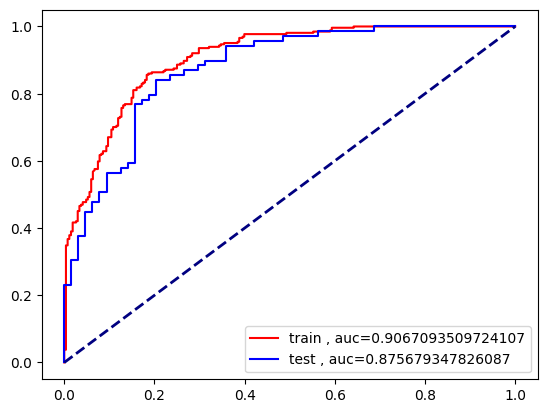

In [ ]:
# สร้าง ROC Curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

clf_model = logreg.fit(X_train, y_train)
y_score_train = clf_model.predict_proba(X_train)
fpr_train, tpr_train, _ = roc_curve(y_train,  y_score_train[:,1])
auc_train = roc_auc_score(y_train, y_score_train[:,1])
plt.plot(fpr_train,tpr_train, color='red', label='train , auc='+str(auc_train))

y_score_test = clf_model.predict_proba(X_test)
fpr_test, tpr_test, _ = roc_curve(y_test,  y_score_test[:,1])
auc_test = roc_auc_score(y_test, y_score_test[:,1])
plt.plot(fpr_test,tpr_test, color='Blue', label='test , auc='+str(auc_test))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc=4)
plt.show()

In [ ]:
def plot_roc(clf, X_train, y_train, X_test, y_test):

  from sklearn.metrics import roc_curve, auc, roc_auc_score
  import matplotlib.pyplot as plt

  clf_model = clf.fit(X_train, y_train)
  y_score_train = clf_model.predict_proba(X_train)
  fpr_train, tpr_train, _ = roc_curve(y_train,  y_score_train[:,1])
  auc_train = roc_auc_score(y_train, y_score_train[:,1])
  plt.plot(fpr_train,tpr_train, color='red', label='train , auc='+str(auc_train))

  y_score_test = clf_model.predict_proba(X_test)
  fpr_test, tpr_test, _ = roc_curve(y_test,  y_score_test[:,1])
  auc_test = roc_auc_score(y_test, y_score_test[:,1])
  plt.plot(fpr_test,tpr_test, color='Blue', label='test , auc='+str(auc_test))

  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.legend(loc=4)
  plt.show()

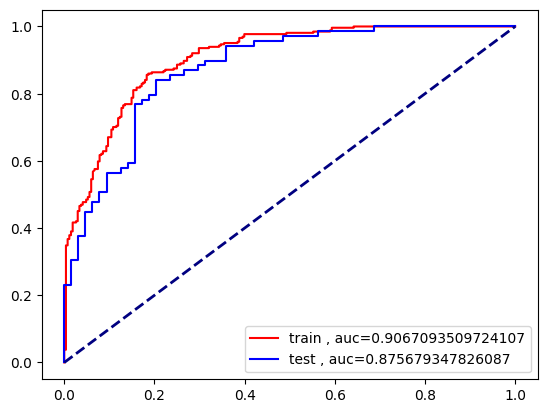

In [ ]:
plot_roc(logreg, X_train, y_train, X_test, y_test)

## กรณีที่ Positive และ Negative มีจำนวนต่างกันมาก (Imbalanced)

ข้อมูลโดยทั่วไปที่เจอในการทำงานจริงนั้น จะมีจำนวน Positive และ Negative ที่ต่างกันค่อนข้างมาก

In [ ]:
# อ่านไฟล์ข้อมูลที่ต้องการวิเคราะห์

url = 'https://github.com/thanachart/ai-builders-tabular-data/raw/main/Data/marketing_campaign_full.csv'
df = pd.read_csv(url, parse_dates=['Dt_Customer'])

In [ ]:
df_summary = df[['ID', 'Response']].groupby(by=['Response']).count().reset_index()
df_summary['Percentage'] = df_summary['ID']/df_summary['ID'].sum()
print(df_summary)

   Response    ID  Percentage
0         0  1906    0.850893
1         1   334    0.149107


In [ ]:
# ลบ row ที่มี missing value

df = df.dropna(how='any',axis=0)

In [ ]:
# จัดการ Time-related column

cut_off_year = 2016
df['Age'] = cut_off_year - df['Year_Birth']
df['Member_Age'] = cut_off_year - df['Dt_Customer'].dt.year

In [ ]:
# feature engineering

df['Total_Spend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
for i in ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']:
  col_name = 'PCT_' + i
  df[col_name] = df[i]/df['Total_Spend']
for i in ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']:
  col_name = 'PCT_' + i
  df[col_name] = df[i]/df['Total_Purchases']
df['PCT_DealsPurchases'] = df['NumDealsPurchases']/df['Total_Purchases']
df['PCT_Campaigns'] = df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].sum(axis=1) / 5

In [ ]:
# one-hot encoding

df_dummmies = pd.get_dummies(df[['Education','Marital_Status']], dtype='int8')
df = df.merge(df_dummmies, left_index=True, right_index=True, how='inner')

In [ ]:
# ลบ row ที่มี missing value

df = df.dropna(how='any',axis=0)

In [ ]:
# สร้าง X และ y

X = df.drop(['Unnamed: 0', 'ID', 'Response', 'Year_Birth', 'Dt_Customer', 'Education','Marital_Status', 'Z_CostContact', 'Z_Revenue'], axis=1)
y = df['Response']

In [ ]:
# สร้าง Train-Test Dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
def classification_model(clf, X_train, y_train, X_test, y_test, show_feature_importance=True):
  ls_y_hat_train = []
  ls_y_train = []

  clf_model = clf.fit(X_train, y_train)
  y_hat_train = clf_model.predict(X_train)
  ls_y_hat_train.extend(y_hat_train)
  ls_y_train.extend(y_train)
  report_train = classification_report(ls_y_train, ls_y_hat_train)
  print('training set')
  print(report_train)
  print('\n')
  ls_y_hat_test = []
  ls_y_test = []
  y_hat_test = clf_model.predict(X_test)
  ls_y_hat_test.extend(y_hat_test)
  ls_y_test.extend(y_test)
  report_test = classification_report(ls_y_test, ls_y_hat_test)
  print('test set')
  print(report_test)
  print('\n')

  if show_feature_importance:
    try:
      print('Standardized Coeff.')
      print(pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":clf_model.coef_[0]}).to_string())
    except:
      try:
        print(pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":clf_model.feature_importances_}).to_string())
      except:
        print("No Standardized Coeff.")

In [ ]:
# run model

logreg = LogisticRegression(solver='liblinear', class_weight='balanced')
classification_model(logreg, X_train, y_train, X_test, y_test, show_feature_importance=False)

training set
              precision    recall  f1-score   support

           0       0.97      0.83      0.90      1517
           1       0.45      0.84      0.59       251

    accuracy                           0.83      1768
   macro avg       0.71      0.84      0.74      1768
weighted avg       0.90      0.83      0.85      1768



test set
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       360
           1       0.49      0.84      0.62        82

    accuracy                           0.81       442
   macro avg       0.72      0.82      0.74       442
weighted avg       0.87      0.81      0.82       442





# Fixing imbalanced with resampling

## Undersampling

เป็นการทำให้จำนวน Positive และ Negative เท่ากัน โดยลดฝั่งที่มีจำนวนเยอะกว่า

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

In [ ]:
# run model

logreg = LogisticRegression(solver='liblinear', class_weight='balanced')
classification_model(logreg, X_train_undersampled, y_train_undersampled, X_test, y_test, show_feature_importance=False)

training set
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       251
           1       0.81      0.80      0.81       251

    accuracy                           0.81       502
   macro avg       0.81      0.81      0.81       502
weighted avg       0.81      0.81      0.81       502



test set
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       360
           1       0.49      0.87      0.63        82

    accuracy                           0.81       442
   macro avg       0.73      0.83      0.75       442
weighted avg       0.88      0.81      0.83       442





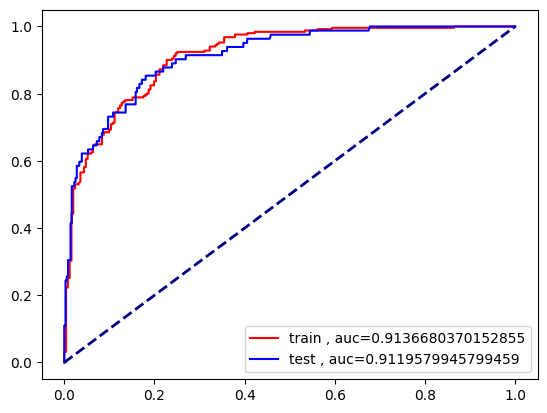

In [ ]:
plot_roc(logreg, X_train_undersampled, y_train_undersampled, X_test, y_test)

## Oversampling

เป็นการทำให้จำนวน Positive และ Negative เท่ากัน โดยเพิ่งฝั่งที่มีจำนวนน้อยกว่า

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)

In [ ]:
# run model

logreg = LogisticRegression(solver='liblinear', class_weight='balanced')
classification_model(logreg, X_train_oversampled, y_train_oversampled, X_test, y_test, show_feature_importance=False)

training set
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1517
           1       0.79      0.77      0.78      1517

    accuracy                           0.78      3034
   macro avg       0.78      0.78      0.78      3034
weighted avg       0.78      0.78      0.78      3034



test set
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       360
           1       0.46      0.83      0.59        82

    accuracy                           0.79       442
   macro avg       0.71      0.80      0.72       442
weighted avg       0.86      0.79      0.81       442





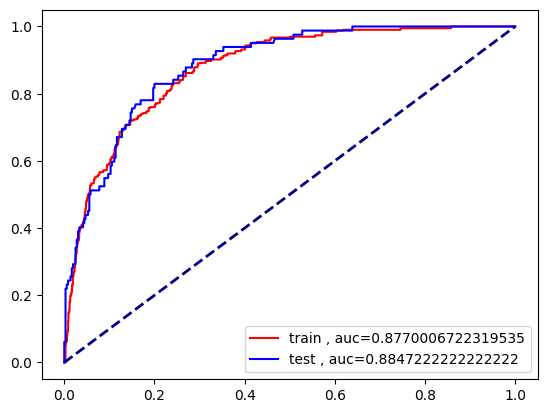

In [ ]:
plot_roc(logreg, X_train_oversampled, y_train_oversampled, X_test, y_test)

## SMOTE - Synthetic Minority Oversampling Technique

เป็นการทำให้จำนวน Positive และ Negative เท่ากัน โดยเพิ่งฝั่งที่มีจำนวนน้อยกว่า จากการสร้าง data จำลองขึ้นมาบนเส้นที่ขีดเชื้่อมกันระหว่างจุดข้อมูลเดิม

<img src=https://github.com/thanachart/ai-builders-tabular-data/raw/main/Images/47.png width="750px">

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [ ]:
# run model

logreg = LogisticRegression(solver='liblinear', class_weight='balanced')
classification_model(logreg, X_train_sm, y_train_sm, X_test, y_test, show_feature_importance=False)

training set
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1517
           1       0.84      0.85      0.84      1517

    accuracy                           0.84      3034
   macro avg       0.84      0.84      0.84      3034
weighted avg       0.84      0.84      0.84      3034



test set
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       360
           1       0.48      0.70      0.57        82

    accuracy                           0.80       442
   macro avg       0.70      0.76      0.72       442
weighted avg       0.84      0.80      0.82       442





/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


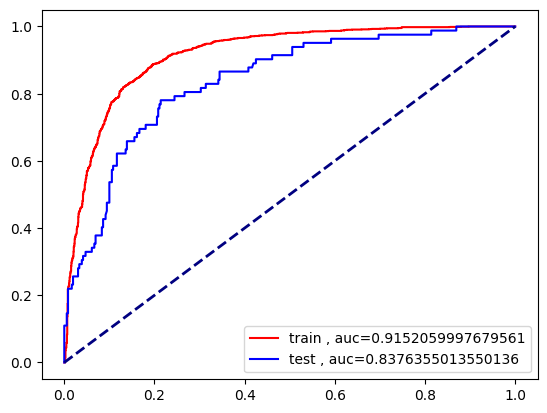

In [ ]:
plot_roc(logreg, X_train_sm, y_train_sm, X_test, y_test)